# Directed Erdos-Renyi random graph
This example concerns running our link community algorithm in a directed Erdos-Renyi random graph. First, let's start by adding the right libraries.

In [1]:
T = True
F = False
# Stadard python libs ----
import numpy as np
import networkx as nx
# Personal libs ----
from networks.toy import TOY
from modules.hierarmerge import Hierarchy
from modules.hierarentropy import Hierarchical_Entropy
from modules.colregion import colregion
from plotting_jupyter.plotting_H import Plot_H
from various.network_tools import get_best_kr, get_labels_from_Z

Now, let's add some variables that are important for the algorithm.

- linkage: The linkage method is applied to the link community algorithm.

- nlog10: Take the logarithm of the data in case it is very heterogeneous.

- lookup: For computing similarities and in the case of nlog10=T, set the zeros into the maximum value of the transformation.

- mapping: Variable used together with nlog10, lookup, and prob. There are three mappings or transformations for the data: **R1** (invert the order), **R2** (preserve the order), and **trivial** (no transformation).

- prob: If the data are probabilities, check that values are in the range (0, 1).

- cut: Compute the quality functions in the link community process using all the steps (**False**) or only the steps which different link community dendrogram heights (**True**).

- mode: Old feature. Associated to the self-loop weight in the feature vectors. Currently, the **ALPHA** mode, the average of the feature vector, and the **BETA** mode, the average using the opposite direction, are supported. The **ALPHA** mode is the traditional one.

- topology: There are three topologies: **SOURCE**, **TARGET**, and **MIX**. This variable determines the direction of the similarities between the nodes

- opt_score: Quality functions to find the best partition. Currently, there are three: $D$ (average link density), **$\chi$** (susceptibility), and the maximum **$\mu$**-score.


In [2]:
linkage = "single"
nlog10 = F
lookup = F
prob = F
cut = T
mode = "ALPHA"
topology = "MIX"
mapping="trivial"
index = "jacp"
opt_score = ["_maxmu", "_X", "_D"]

properties = {
  "version" : "ER",
  "nlog10" : nlog10,
  "lookup" : lookup,
  "prob" : prob,
  "cut" : cut,
  "mapping" : mapping,
  "topology" : topology,
  "index" : index,
  "mode" : mode
}

Create a directed Erdos-Renyi random graph and pass it to the TOY class.

In [3]:
rho = 0.6                                                   # Network density
N = 128                                                     # Number of nodes
M = int(N * (N - 1) * 0.57)                                 # Number of edges
G = nx.gnm_random_graph(N, M, seed=12345, directed=T)       # Create random graph using networkx
A = nx.adjacency_matrix(G).todense()                        # Convert it to adjacency matrix
A = np.array(A, dtype=float)                                # Convert it to a numpy object
labels = np.arange(N).astype(int).astype(str)               # Create the nodes' labels
                                                            #     and save them in dictionary
labels_dict = dict()
for i in np.arange(N):
  labels_dict[i] = labels[i]
# Create TOY ---
NET = TOY(A, linkage, **properties)
NET.set_alpha([6, 15])
NET.set_labels(labels)

Finally, run the Hierarchy class which runs the link community analysis.
PD: if you see RuntimeWarnigs, they come from the similarities computed using the jacp feature. The warning is not important.

In [4]:
H = Hierarchy(
  NET, A, A, np.zeros(A.shape),
  N, linkage, mode
)
## Compute quality functions ----
H.BH_features_parallel()
## Compute link entropy ----
H.link_entropy_cpp("short", cut=cut)
## Compute node communty dendrogram ----
H.la_abre_a_merde_cpp(H.BH[0])
# Set labels to network ----
L = colregion(NET, labels=NET.labels)
L.get_regions()
H.set_colregion(L)

Computing features over mu-score space


/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/usr/local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Starting Z2dict

	link entropy :  Sh : 0.2047, and Sv : 0.7953

Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 18529

	link entropy H: Sh : 0.2036, and Sv : 0.7964

Commencer: la abre a merde
Voila, bon ami


Let's see the performance of the $\mu$-score, $\chi$, $D$, and the order parameter ($m$) variables during the link community agglomeration process.

Node hierarchy entropy

In [5]:
# Entropy ----
HS = Hierarchical_Entropy(H.Z, H.nodes, list(range(H.nodes)))
HS.Z2dict("short")
node_entropy = HS.S(HS.tree)
node_entropy_H = HS.S_height(HS.tree)
H.entropy = [
  node_entropy, node_entropy_H,
  H.link_entropy, H.link_entropy_H
]


	Node entropy :  Sh : 0.0694, and Sv : 0.9306


	Node entropy H: Sh : 0.0154, and Sv : 0.9846



Newick format for binary and weigthed tree

In [6]:
HS.zdict2newick(HS.tree, weighted=F, on=T)
HS.zdict2newick(HS.tree, weighted=T, on=T)

Print hierarchy newicks
(((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((5:1,36:1):1,1:1):1,(((4:1,81:1):1,((82:1,85:1):1,96:1):1):1,69:1):1):1,(15:1,47:1):1):1,(25:1,90:1):1):1,39:1):1,(22:1,51:1):1):1,123:1):1,(29:1,120:1):1):1,23:1):1,103:1):1,(11:1,56:1):1):1,89:1):1,(71:1,87:1):1):1,(12:1,55:1):1):1,(74:1,92:1):1):1,99:1):1,18:1):1,101:1):1,(37:1,66:1):1):1,93:1):1,(113:1,122:1):1):1,(26:1,105:1):1):1,117:1):1,41:1):1,(8:1,48:1):1):1,61:1):1,3:1):1,(95:1,124:1):1):1,72:1):1,44:1):1,((16:1,80:1):1,57:1):1):1,(10:1,21:1):1):1,(110:1,116:1):1):1,((64:1,77:1):1,(84:1,86:1):1):1):1,107:1):1,(13:1,65:1):1):1,0:1):1,24:1):1,94:1):1,54:1):1,(27:1,43:1):1):1,(62:1,125:1):1):1,78:1):1,98:1):1,127:1):1,121:1):1,83:1):1,(88:1,100:1):1):1,(42:1,91:1):1):1,46:1):1,49:1):1,(17:1,33:1):1):1,79:1):1,(20:1,63:1):1):1,59:1):1,(52:1,106:1):1):1,109:1):1,(76:1,104:1):1):1,(50:1,75:1):1):1,34:1):1,31:1):1,45:1):1,60:1):1,9:1):1,(73:1,108:1):1):1,(67:1,102:1):1):1,7

Visualize Entropy iterations!!!
Levels node hierarchy: 89
Levels link hierarchy: 1133
             S dir                 c  level
210   0.003568   H  node_hierarchy_H     57
267   0.745921   V  node_hierarchy_H     89
34    0.007510   H    node_hierarchy     55
122   0.023849   V    node_hierarchy     56
2668  0.004649   H  link_hierarchy_H   1087
3801  0.013531   V  link_hierarchy_H   1087
412   0.000890   H    link_hierarchy   1077
1544  0.001917   V    link_hierarchy   1078
Plot Mu iterations
Plot X iterations
Plot D iterations
Plot order parameter iterations


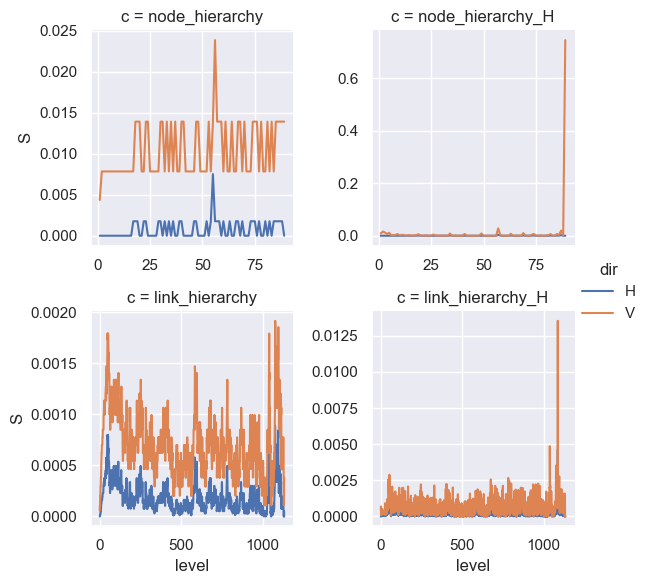

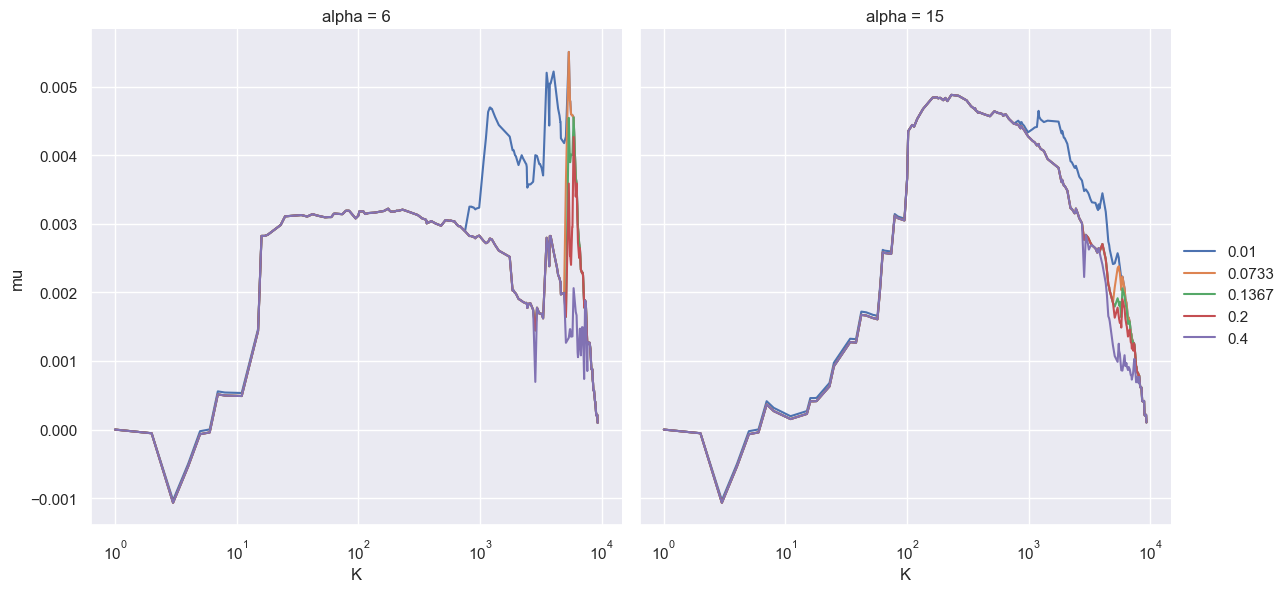

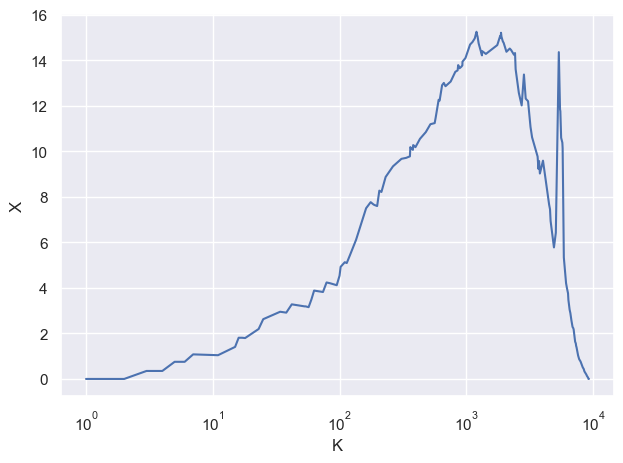

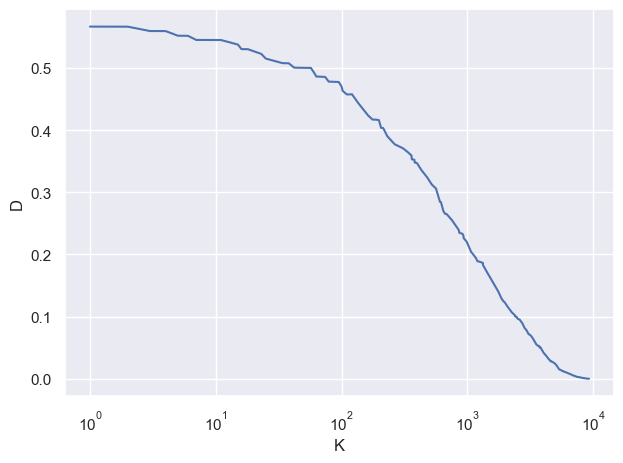

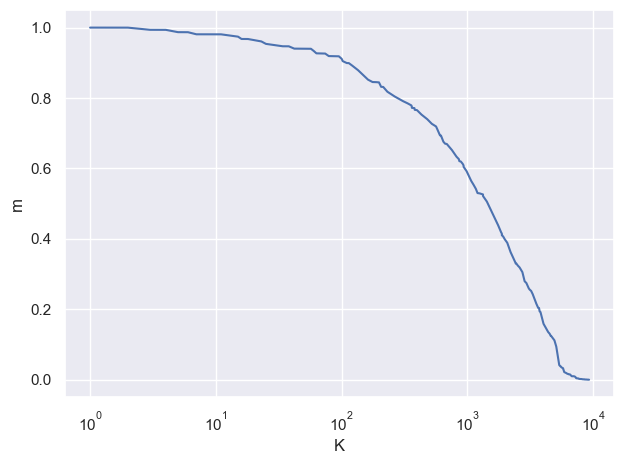

In [7]:
# Plot H ----
plot_h = Plot_H(NET, H)
plot_h.plot_measurements_Entropy()
plot_h.plot_measurements_mu()
plot_h.plot_measurements_X()
plot_h.plot_measurements_D()
plot_h.plot_measurements_order_parameter()

Let's look at the partitions using the different quality functions. Note that in the matrix link community representation, the order of the matrix comes from the node dendrogram and carmine links represent tree-like, zero-link density, link communities.
- $\mu$-score partition.

Visualize k LCs!!!
Visualize node-community dendrogram!!!


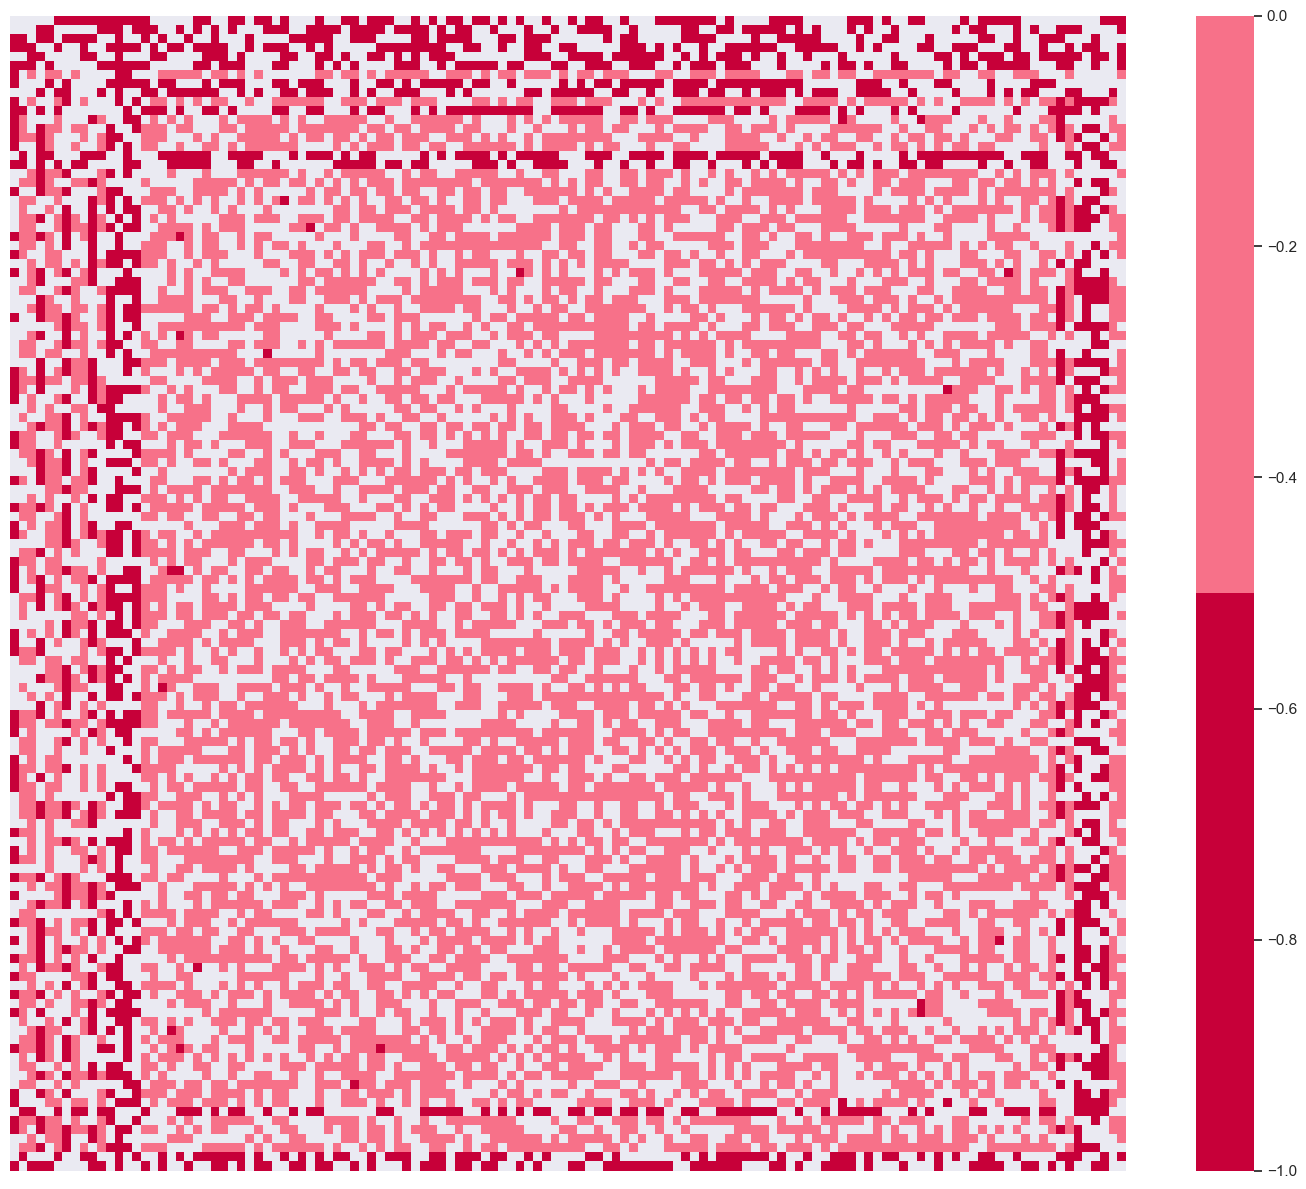

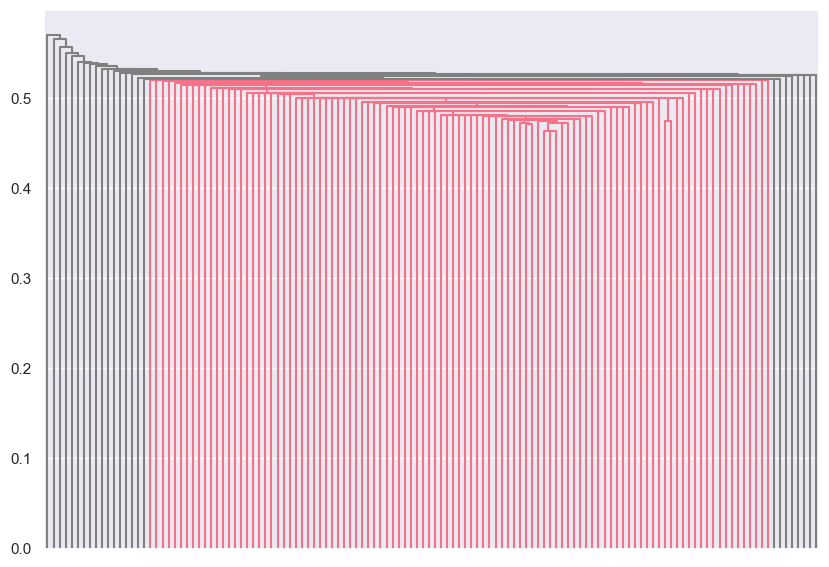

In [8]:
score = "_maxmu"
K, R = get_best_kr(score, H)
r = R[K == np.min(K)][0]
k = K[K == np.min(K)][0]
rlabels = get_labels_from_Z(H.Z, r)
plot_h.lcmap_dendro(
  [k], cmap_name="husl", remove_labels=True
)
plot_h.core_dendrogram(
  [r], cmap_name="husl", remove_labels=True
)

- $\chi$

Visualize k LCs!!!
Visualize node-community dendrogram!!!


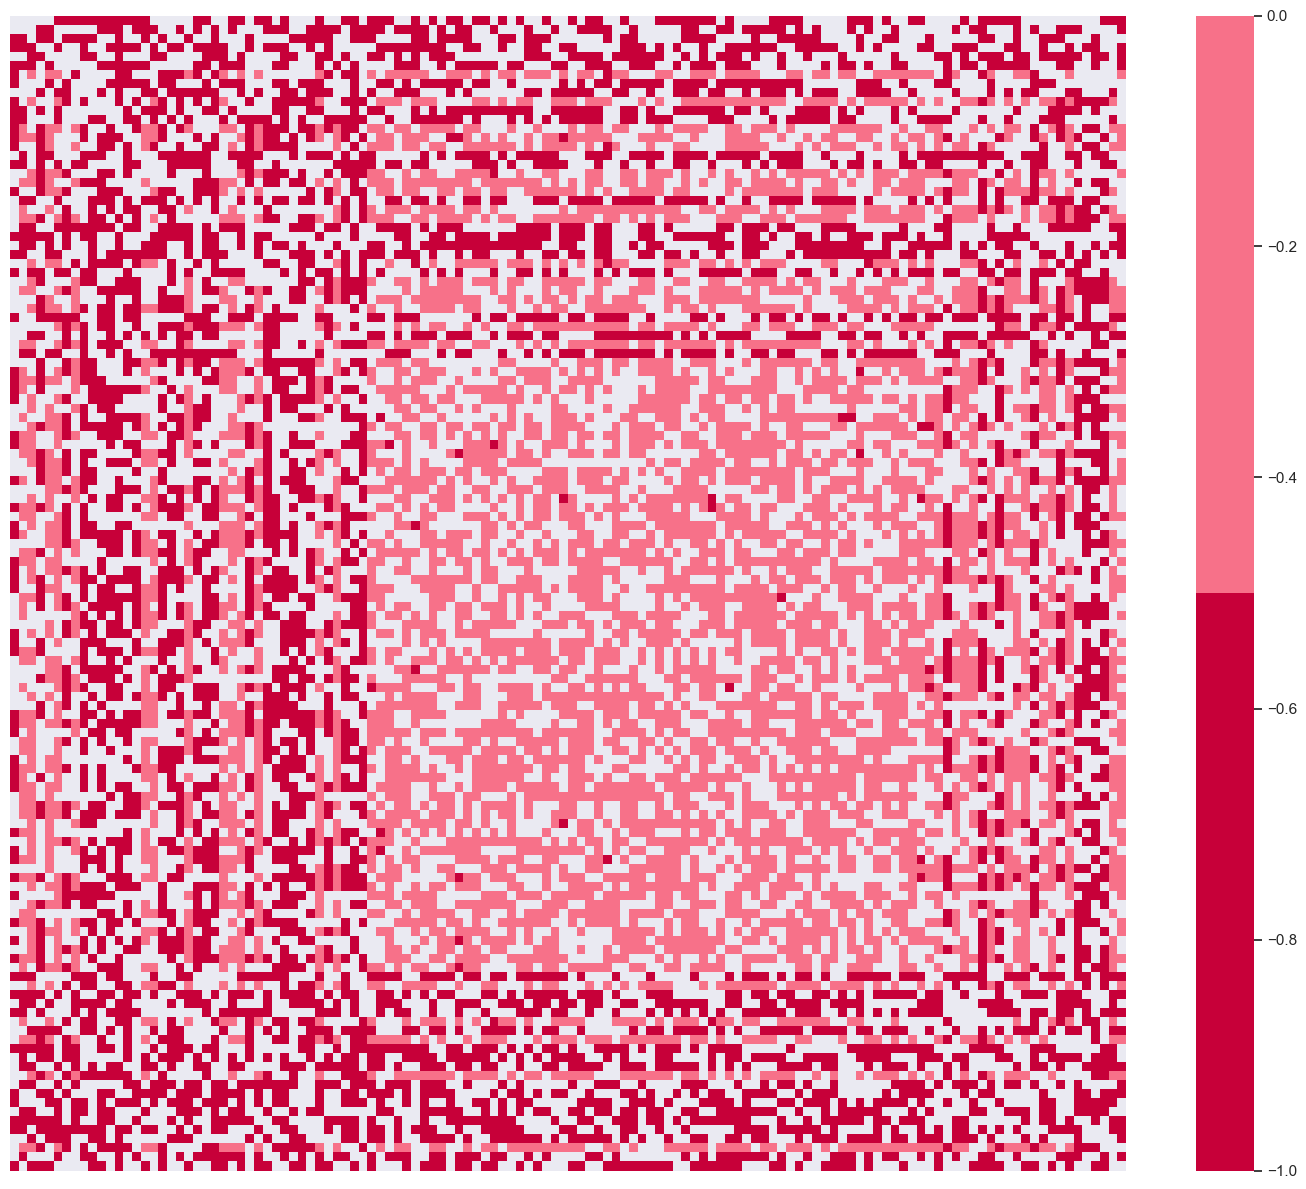

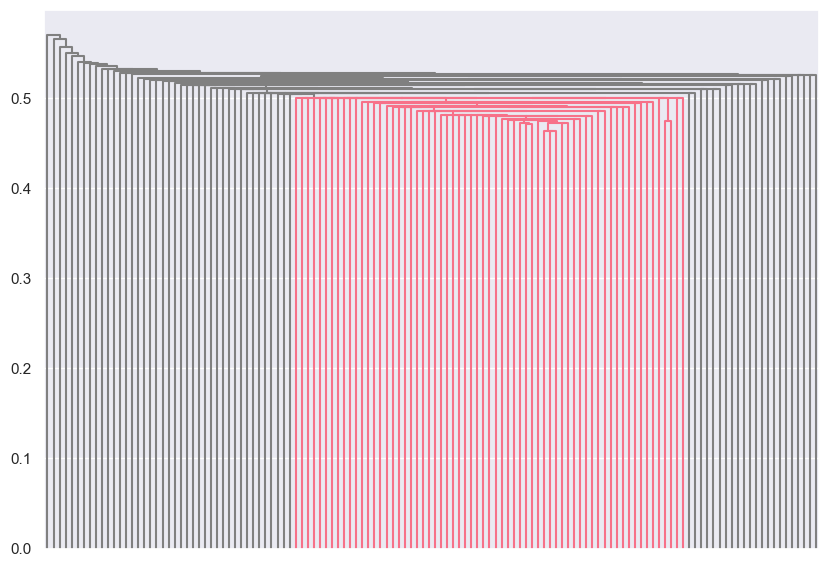

In [9]:
score = "_X"
K, R = get_best_kr(score, H)
r = R[K == np.min(K)][0]
k = K[K == np.min(K)][0]
rlabels = get_labels_from_Z(H.Z, r)
plot_h.lcmap_dendro(
  [k], cmap_name="husl", remove_labels=True
)
plot_h.core_dendrogram(
  [r], cmap_name="husl", remove_labels=True
)

- $D$ (average link community density, the original quality function)

Visualize k LCs!!!
Visualize node-community dendrogram!!!


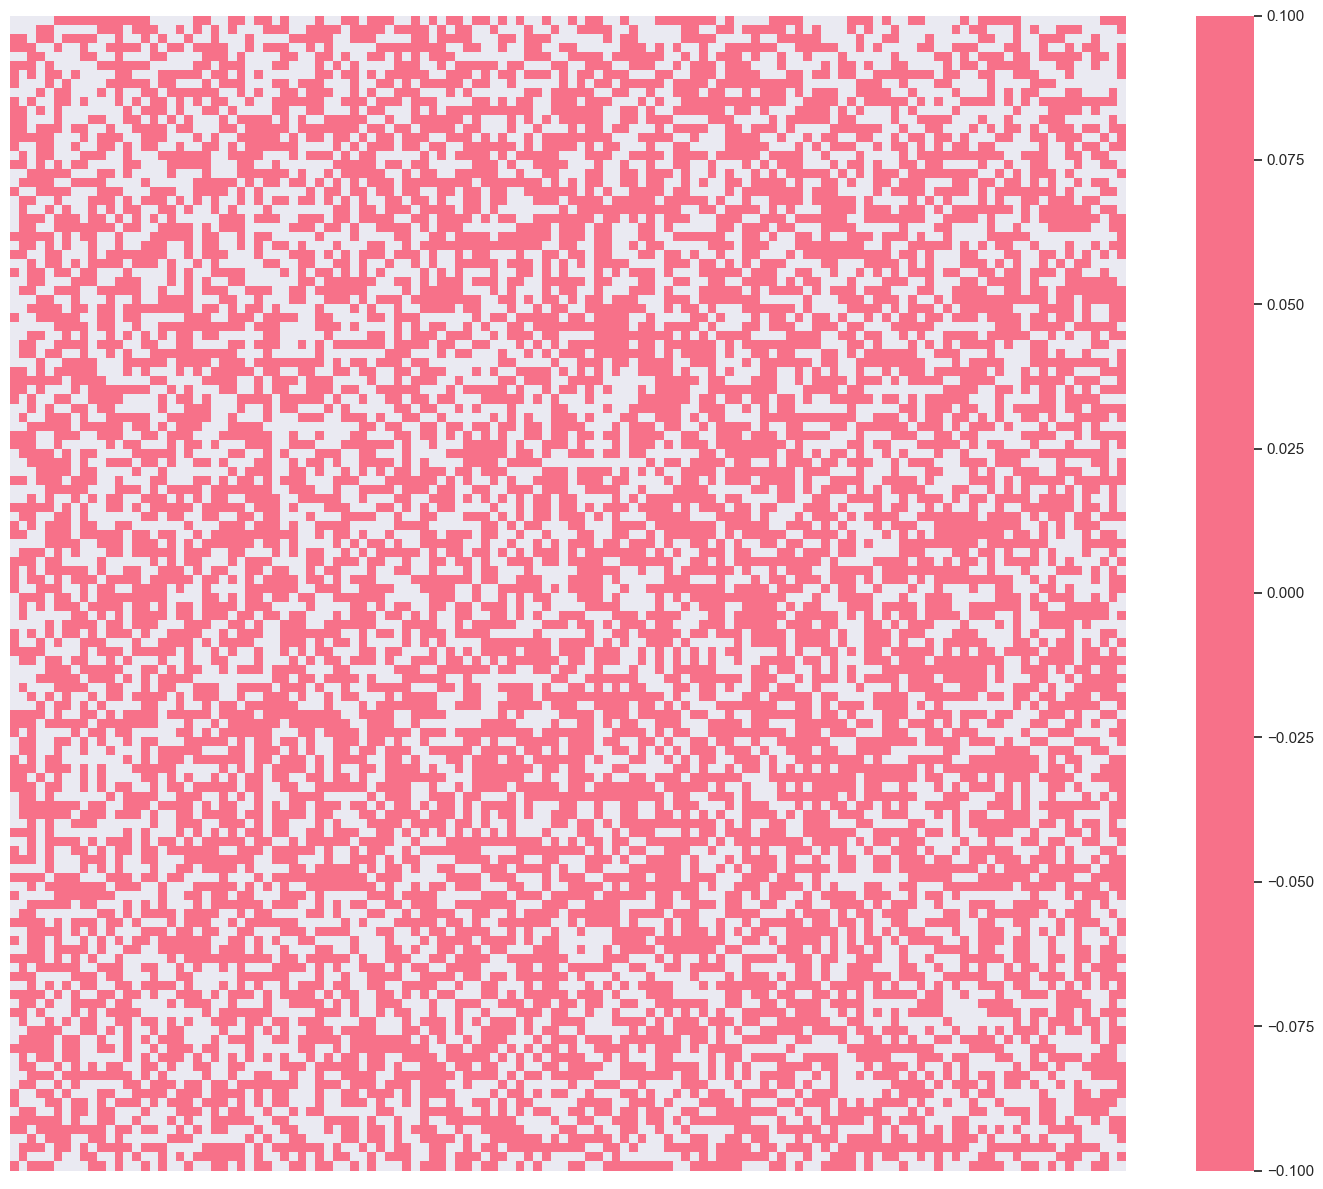

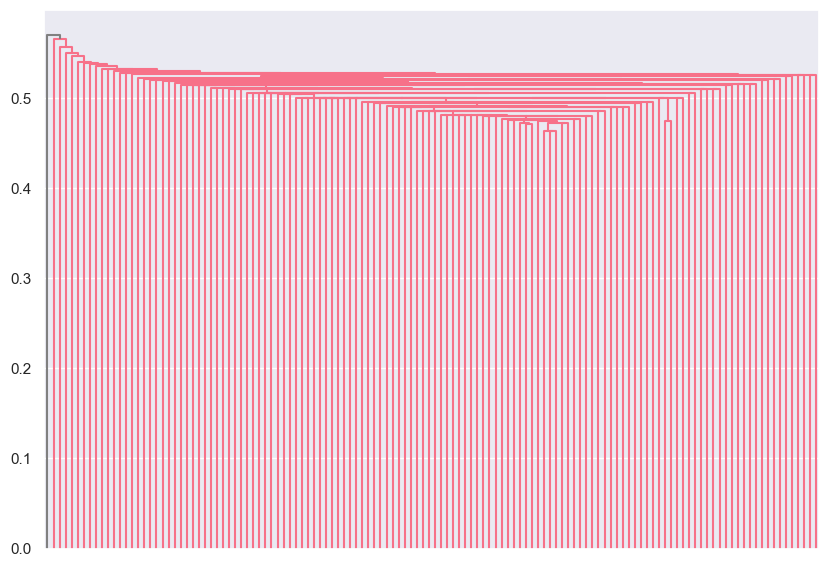

In [10]:
score = "_D"
K, R = get_best_kr(score, H)
r = R[K == np.min(K)][0]
k = K[K == np.min(K)][0]
rlabels = get_labels_from_Z(H.Z, r)
plot_h.lcmap_dendro(
  [k], cmap_name="husl", remove_labels=True
)
plot_h.core_dendrogram(
  [r], cmap_name="husl", remove_labels=True
)

## Conclusions

1. As can be noted, the node hierarchy shows the minimal structure as expected for a Erdos-Renyi network.
2. The link community density fails because the network is dense ($\rho=0.6$). The graph varies very smoothly which means that link communities were appearing and disappearing constantly. This fast behavior is associated with a lack of structure.
3. The order parameter ($m$) plot confirms the lack of structure. If the giant component did not experience any jump, there were no other link communities of similar forming in parallel. Without them, an appreciable size change in the giant component is not possible.
4. The maximum $\mu$-score found the little community structure with nodes of similar size (3), while the $\chi$ function found the most giant possible partition before the random incorporation to the hierarchy of the rest of the nodes. This is a good example to understand the behavior of both functions. The maximum $\mu$-score finds smaller and more uniform (warmer) partitions while the $\chi$ score bigger and more heterogeneous (colder) partitions.